<a href="https://colab.research.google.com/github/MarcoE25/Clases-Analisis-Datos/blob/main/Clase_4_intermedio_202508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐼 Maestro en Pandas - Itinerario

* **Automatizaciones con funciones**: flujo de limpieza de datos, y adaptar al dataset de ejecutivos
* **Merges**: unión con tabla de ejecutivos
* **Filtros**: máscaras booleanas y consultas en Pandas
* **Group by**: agrupaciones para datos agregados
* **Gráficos directos**: barras y de dispersión
* **+POO**: Creación de una clase y una librería

---

# Automatización de la función

In [ ]:
import pandas as pd
from dateutil import parser
import datetime as dt
import random as r

# Webscraping
import urllib.request, json
from urllib.request import urlopen
from zipfile import ZipFile
import re

# Resumen clase anterior

* Automatización y robustecimiento de la función de limpieza.
* Integración con la función de valorización.
* Todo en un solo lugar, listo para crear nuestra propia librería.

---

### Obtenemos el valor del dólar y del euro del día de hoy

In [ ]:
# Primera version
df_bank = pd.read_csv("https://cursopypagina.github.io/CursoPy/Clase_1.csv")

########################### Valorizacion #######################################
def divisa_webs(clave):
  # Leemos la web y docodificamos
  url = "https://www.piplatam.com/Home/filiales?country=MX"
  page = urlopen(url)
  htmlBytes = page.read()
  html = htmlBytes.decode("utf-8")

  # De todo el string anterior, buscamos el indice donde comienza
  # la clave que estamos buscando
  strValorClave = html.find(clave)
  stringFiltro1 = html[strValorClave:]

  # USD-MXN FIX (Banxico)","dblValue":18.6873,"dblChange":18.7072,"dblPerChange":-0.019899999999999807,"txtDate":"09/03"}
  strValor = stringFiltro1.split("dblValue")[1].split("dblChange")[0]

  # ":18.6873,"
  strValor = re.findall(r"\d+\.\d+", strValor)[0]
  return strValor

usdValor = round(float(divisa_webs("USD-MXN FIX (Banxico)")), 2)
eurValor = round(float(divisa_webs("EUR-MXN")), 2)

print(f"Valor del dólar 🪙: {usdValor} pesos mxn")
print(f"Valor del euro 🪙: {eurValor} pesos mxn")

Valor del dólar 🪙: 18.68 pesos mxn
Valor del euro 🪙: 21.88 pesos mxn


# Queremos obtener la info de los créditos y su ejecutivo en un solo lugar (join)

### Accedemos a la tabla con los ejecutivos

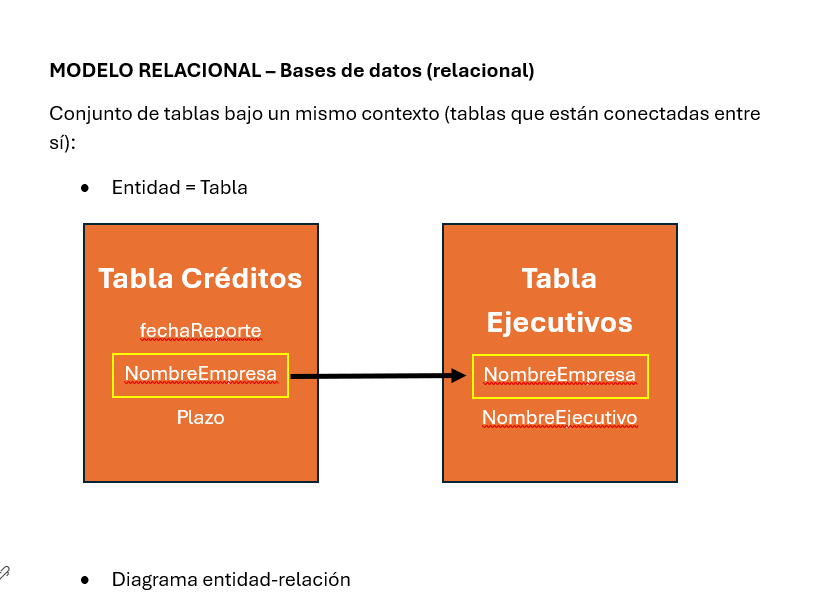

In [ ]:
df_bank_ej = pd.read_csv("https://cursopypagina.github.io/CursoPy/Clase_1_5.csv")

# Cambiamos el nombre de la columna con el siguiente comando
#                                        nombre de la columna antes del cambio
#                                                                 nuevo nombre
df_bank_ej = df_bank_ej.rename(columns={"Fecha_Inicio_Contrato": "Fecha_Inicio"})

# nombreDataframe["nombrecolumna"] ---> acceder a solo una columna
# nombreDataframe[["nombrecolumna_1", "nombrecolumna_2", . . .]]
df_bank_ej = df_bank_ej[["Nombre_Empresa", "Ejecutivo", "Fecha_Inicio"]]
df_bank_ej.head()

,Nombre_Empresa,Ejecutivo,Fecha_Inicio
0,TELMEX,Daniel Escobedo Alcántar,2018-07-28
1,TELMEX,Alejandro Manuel Pantoja Olivo,2023-10-06
2,GRUPO CARSO,Anabel Anel Quintanilla,"January 31, 2020"
3,WALMART DE MÉXICO,Irma Tomás Alfaro,"April 28, 2022"
4,GRUPO CARSO,Frida Heredia Merino,13-Jul-2025


In [ ]:
def clean_1(df_func, tipo):
  # creamos una copia de nuestro dataframe original para evitar
  # modificarlo, asi, solo modificaremos la copia
  df_func_trabajo = df_func.copy()

  ############################# PROCESO DE LIMPIEZA ############################
  df_func_trabajo['Nombre_Empresa'] = df_func_trabajo['Nombre_Empresa'].str.strip().str.title()
  df_func_trabajo["Fecha_Inicio"] = df_func_trabajo["Fecha_Inicio"].apply(lambda x: parser.parse(x))

  if tipo == "Ejecutivo":
    return df_func_trabajo
  elif tipo == "General":
    df_func_trabajo['Fecha_Fin'] = df_func_trabajo['Fecha_Fin'].fillna('1900-01-01')
    df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].fillna(0)
    df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].astype(int)

    # Homologarlas columnas de fecha
    df_func_trabajo['Fecha_Fin'] = df_func_trabajo['Fecha_Fin'].apply(lambda x: parser.parse(x))
    df_func_trabajo['Operacion'] = df_func_trabajo['Operacion'].str.split("-").apply(lambda x: x[1])

    ############################# AGREGAMOS COLUMNAS NUEVAS ######################
    fechaReporte = dt.datetime.today() - dt.timedelta(days = 1)
    fechaReporte = dt.datetime.strftime(fechaReporte, "%Y-%m-%d")
    df_func_trabajo['Fecha_Reporte'] = fechaReporte
    return df_func_trabajo
  else:
    print("⚠️Nombre inválido⚠️")

In [ ]:
df_bank_clean = clean_1(df_bank, "General")
df_bank_clean_ej = clean_1(df_bank_ej, "Ejecutivo")

In [ ]:
df_bank_clean.head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte
0,Grupo Bimbo,4117589.71,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-05
1,Walmart De México,7008028.47,USD,100001,2017-04-10,2022-02-18,1775,2025-09-05
2,Liverpool,9918174.32,EUR,100002,2017-04-21,1900-01-01,0,2025-09-05
3,Grupo Lala,1293043.34,USD,100003,2023-11-24,1900-01-01,0,2025-09-05
4,Femsa,7128647.73,EUR,100004,2024-10-30,1900-01-01,0,2025-09-05


In [ ]:
df_bank_clean_ej.tail()

,Nombre_Empresa,Ejecutivo,Fecha_Inicio
995,Grupo Bimbo,Luis Manuel Ana María Vera Domínguez,2017-07-29
996,Alsea,Sandra Rodolfo Amador,2020-11-29
997,Walmart De México,Eloisa Salinas Aguilar,2018-12-10
998,Grupo Lala,Juana Antonia Lira Samaniego,2022-01-04
999,Soriana,Alfonso Natalia Sevilla,2020-04-19


# Group By

* ¿Qué es un group by?
* Aplicación en la limpieza de datos para detectar duplicados

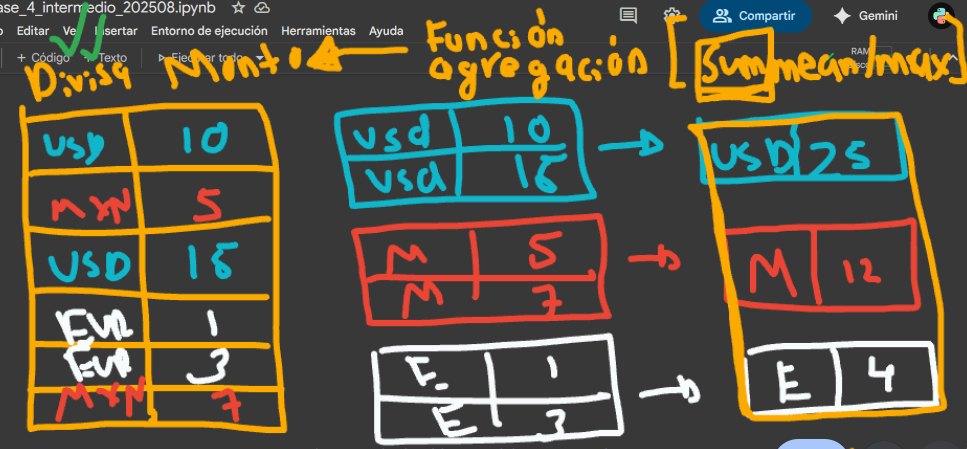

In [ ]:
# Agrupamos por nombre de la empresa y queremos contador
# cuantos ejecutivos diferentes tiene cada empresa
# nombreDataframe.groupby("columnaCategoria").funcionAgregacion()
# .sum()
# .mean()
# .max()
# .min()
# .count()
df_bank_clean_ej_gb = df_bank_clean_ej.groupby("Nombre_Empresa").count()

# pasar de una indice a una columna ---> reset_index()
df_bank_clean_ej_gb = df_bank_clean_ej_gb.reset_index()
del df_bank_clean_ej_gb['Fecha_Inicio']
df_bank_clean_ej_gb.head()

,Nombre_Empresa,Ejecutivo
0,Alsea,63
1,América Móvil,67
2,Banorte,56
3,Bbva México,57
4,Cemex,61


In [ ]:
# obtenemos todos los valores diferentes de la columna "Ejecutivo"
# df_bank_clean_ej_gb['Ejecutivo'].unique() ---> array([1]) ---> no hay duplicados
df_bank_clean_ej_gb['Ejecutivo'].unique()

array([63, 67, 56, 57, 61, 69, 77, 70, 68, 75, 58, 74])

In [ ]:
# df_bank_clean_ej.groupby("Nombre_Empresa").count(): conteo por el nombre de la empresa
# df_bank_clean_ej.groupby("Nombre_Empresa").sum(): la suma por el nombre de la empresa

,Nombre_Empresa,Ejecutivo,Fecha_Inicio
0,Telmex,Daniel Escobedo Alcántar,2018-07-28
1,Telmex,Alejandro Manuel Pantoja Olivo,2023-10-06
2,Grupo Carso,Anabel Anel Quintanilla,2020-01-31
3,Walmart De México,Irma Tomás Alfaro,2022-04-28
4,Grupo Carso,Frida Heredia Merino,2025-07-13


In [ ]:
# Obtener cuanto nos deben por divisa
# Tabla dinamica de EXCEL
df_temp = df_bank_clean[['Divisa', "Monto_Credito"]].groupby("Divisa").sum().reset_index()
df_temp

,Divisa,Monto_Credito
0,EUR,1.717278e+10
1,MXN,1.650154e+10
2,USD,1.710148e+10


In [ ]:
# format-string
f"{1000000:,}"

'1,000,000'

In [ ]:
df_temp['Monto_Credito'].apply(lambda x: f"{x:,}")

,Monto_Credito
0,"17,172,775,066.66"
1,"16,501,540,339.68"
2,"17,101,476,284.9"


In [ ]:
# accedemos a los nombres de las columnas del dataframe
df_bank_clean.columns

Index(['Nombre_Empresa', 'Monto_Credito', 'Divisa', 'Operacion',
       'Fecha_Inicio', 'Fecha_Fin', 'Plazo', 'Fecha_Reporte'],
      dtype='object')

In [ ]:
# agg(): funcion para personalizar las agregaciones
# f_bank_clean[['Divisa', "Monto_Credito"]].groupby("Divisa").sum().reset_index()
df_temp2 = df_bank_clean[['Divisa', "Monto_Credito"]].groupby("Divisa").agg(
    {
      "Monto_Credito": ["sum"],
      #"Monto_Vista": ["mean"]
    }
  )
df_temp2 = df_temp2.reset_index()
df_temp2

,Divisa,Monto_Credito
,,sum
0,EUR,1.717278e+10
1,MXN,1.650154e+10
2,USD,1.710148e+10


In [ ]:
df_temp2.columns = ["Divisa", "Monto_Credito"]
df_temp2.columns

Index(['Divisa', 'Monto_Credito'], dtype='object')

In [ ]:
df_temp2

,Divisa,Monto_Credito
0,EUR,1.717278e+10
1,MXN,1.650154e+10
2,USD,1.710148e+10


---

In [ ]:
# @title Truco integridad
df_bank_clean_ej = df_bank_clean_ej[['Nombre_Empresa', 'Ejecutivo', "Fecha_Inicio"]]
empresas = list(df_bank_clean['Nombre_Empresa'].unique())
df_bank_clean_ej['Nombre_Empresa'] = [r.choice(empresas) for i in range(len(df_bank_clean_ej))]
df_bank_clean_ej.head()

,Nombre_Empresa,Ejecutivo,Fecha_Inicio
0,Grupo México,Daniel Escobedo Alcántar,2018-07-28
1,Soriana,Alejandro Manuel Pantoja Olivo,2023-10-06
2,Grupo Bimbo,Anabel Anel Quintanilla,2020-01-31
3,Grupo Lala,Irma Tomás Alfaro,2022-04-28
4,Grupo Lala,Frida Heredia Merino,2025-07-13


In [ ]:
df_bank_clean_ej[df_bank_clean_ej['Nombre_Empresa'] == 'Alsea'].head()

,Nombre_Empresa,Ejecutivo,Fecha_Inicio
9,Alsea,Micaela Velásquez,2019-10-21
14,Alsea,Homero Cristobal Romero Cortez,2021-03-14
28,Alsea,Ing. Pedro Frías,2023-12-19
30,Alsea,Luis Manuel Ana María Vera Domínguez,2020-06-06
42,Alsea,Mercedes Pablo Sanabria,2017-10-18


In [ ]:
df_bank_clean_ej[df_bank_clean_ej['Nombre_Empresa'] == 'Alsea']['Fecha_Inicio'].max()

Timestamp('2025-07-12 00:00:00')

In [ ]:
# con group by te puedes quedar solo con el ultimo registro
df_ejec_unicos = df_bank_clean_ej.groupby('Nombre_Empresa').agg(
    {
        "Ejecutivo": ['max'],
        "Fecha_Inicio": ['max']
    }
).reset_index()
df_ejec_unicos.head()

,Nombre_Empresa,Ejecutivo,Fecha_Inicio
,,max,max
0,Alsea,Óscar González Griego,2025-07-12
1,América Móvil,Óscar González Griego,2025-08-20
2,Banorte,Víctor Judith Leal Chapa,2025-08-18
3,Bbva México,Óscar González Griego,2025-03-10
4,Cemex,Óscar González Griego,2025-07-06


In [ ]:
df_bank_clean_ej["Ejecutivo"].sample(14)

,Ejecutivo
636,Ivonne Cristian Crespo
215,Marco Antonio Esther Tamez Ponce
731,Frida Heredia Merino
730,Concepción Pedroza Ruelas
200,Cristobal Miguel Ángel Armenta Mayorga
870,Víctor Judith Leal Chapa
875,Linda Isabela Zambrano
99,Juana Antonia Lira Samaniego
242,Humberto Núñez
140,Gloria Otero Sáenz


In [ ]:
df_bank_clean_ej["Ejecutivo"].sample(len(df_ejec_unicos)).to_list()

['Linda Isabela Zambrano',
 'Lic. Gilberto Camacho',
 'Ing. Pedro Frías',
 'Helena Durán',
 'Cristobal Miguel Ángel Armenta Mayorga',
 'Mercedes Pablo Sanabria',
 'Ruby Alma Ulloa Puente',
 'Mercedes Pablo Sanabria',
 'Guillermo Cristian Hernandes',
 'Eloisa Salinas Aguilar',
 'Alejandra Susana Rodríguez Muro',
 'Homero Cristobal Romero Cortez',
 'Óscar González Griego',
 'Víctor Judith Leal Chapa',
 'Sofía de la Rosa']

In [ ]:
df_ejec_unicos["Ejecutivo"] = df_bank_clean_ej["Ejecutivo"].sample(len(df_ejec_unicos)).to_list()
df_ejec_unicos

,Nombre_Empresa,Ejecutivo,Fecha_Inicio,Ejecutivos
0,Alsea,Sandra Rodolfo Amador,2025-07-12,NaN
1,América Móvil,Sr(a). Salma Esquivel,2025-08-20,NaN
2,Banorte,Ruby Alma Ulloa Puente,2025-08-18,NaN
3,Bbva México,Frida Heredia Merino,2025-03-10,NaN
4,Cemex,Daniel Nadia Camacho,2025-07-06,NaN
5,Femsa,Daniel Nadia Camacho,2025-04-21,NaN
6,Grupo Bimbo,Alejandra Susana Rodríguez Muro,2025-08-03,NaN
7,Grupo Carso,Frida Heredia Merino,2025-08-12,NaN
8,Grupo Lala,Luis Manuel Ana María Vera Domínguez,2025-07-13,NaN
9,Grupo México,Daniel Nadia Camacho,2025-07-30,NaN


# Merge

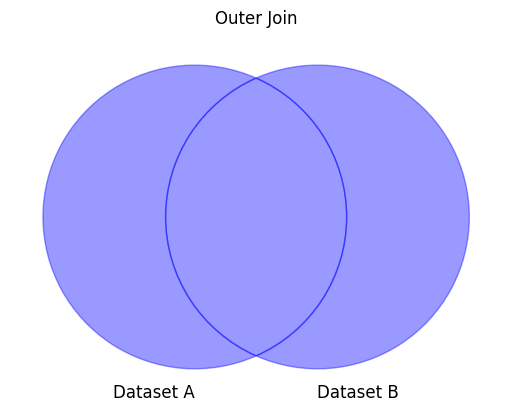

In [ ]:
# @title Dibujo merges
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')
# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('blue')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Outer Join')
plt.show()

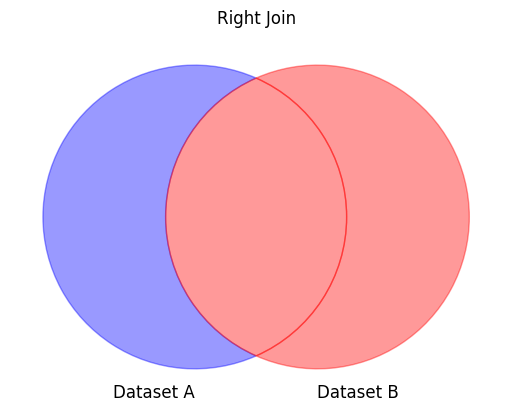

In [ ]:
# @title
# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('red')
venn1.get_patch_by_id('01').set_color('red')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Right Join')
plt.show()

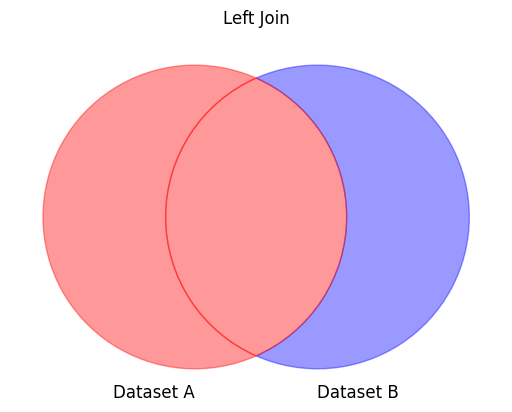

In [ ]:
# @title
# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('red')
venn1.get_patch_by_id('11').set_color('red')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Left Join')
plt.show()

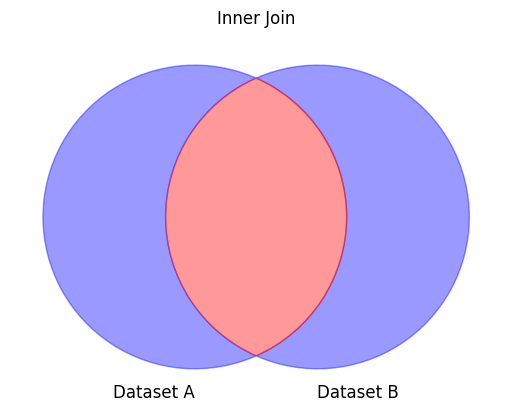

In [ ]:
# @title
# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('red')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Inner Join')
plt.show()

In [ ]:
df_final = df_bank_clean.merge(df_ejec_unicos[['Nombre_Empresa', 'Ejecutivo']], on='Nombre_Empresa', how='left')
df_final.head()

,Nombre_Empresa,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Monto_Credito_Val,Zona,Ejecutivo
0,Grupo Bimbo,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-04,4.117590e+06,NORTE,Alejandra Susana Rodríguez Muro
1,Walmart De México,USD,100001,2017-04-10,2022-02-18,1775,2025-09-04,1.314706e+08,CENTRO,Anabel Anel Quintanilla
2,Liverpool,EUR,100002,2017-04-21,1900-01-01,0,2025-09-04,2.166129e+08,NORTE,Clara Cristobal Barreto Márquez
3,Grupo Lala,USD,100003,2023-11-24,1900-01-01,0,2025-09-04,2.425749e+07,CENTRO,Luis Manuel Ana María Vera Domínguez
4,Femsa,EUR,100004,2024-10-30,1900-01-01,0,2025-09-04,1.556897e+08,SUR,Daniel Nadia Camacho


In [ ]:
print(df_bank_clean.shape)
print(df_final.shape)

(10000, 9)
(10000, 10)


In [ ]:
# cuantos creditos tiene bimbo
df_final[df_final['Nombre_Empresa'] == "Grupo Bimbo"].shape

(656, 10)

* ¿Cuánto nos deben por zona?
* ¿Cuánto debe en total bimbo?
* Crea un función para saber lo anterior dependiende del nombre de la empresa
* ¿Cuánto nos deben por divisa?
* Crea un columna condicional con tasas

# Filtros

In [ ]:
# Mascaras booleanas
# query pandas
df_bank_ejec.query("Plazo == 1")

,Nombre_Empresa,Tipo,Divisa,Monto,Plazo,Fecha_Inicio_Contrato,Ejecutivo
0,soriana,Vista,MXN,768489.72,1,2018-07-28,Daniel Escobedo Alcántar
1,grupo lala,Vista,EUR,4885585.41,1,2023-10-06,Alejandro Manuel Pantoja Olivo
3,soriana,Vista,USD,2597613.53,1,"April 28, 2022",Irma Tomás Alfaro
6,BANORTE,Vista,MXN,2221490.67,1,20/09/2022,Sr(a). Salma Esquivel
8,CEMEX,Vista,MXN,4360084.72,1,"April 15, 2016",Fernando Rivera Maestas
...,...,...,...,...,...,...,...
988,bbva méxico,Vista,USD,1337510.26,1,05-May-2022,Guillermo Cristian Hernandes
989,cemex,Vista,MXN,896530.02,1,"July 23, 2021",Samuel Yuridia Huerta
990,walmart de méxico,Vista,USD,2213211.09,1,2021-05-05,Juana Antonia Lira Samaniego
994,alsea,Vista,MXN,3918208.52,1,"October 17, 2018",Gabino Mariano Laureano Puente


# Gráficos directos

<Axes: xlabel='Divisa'>

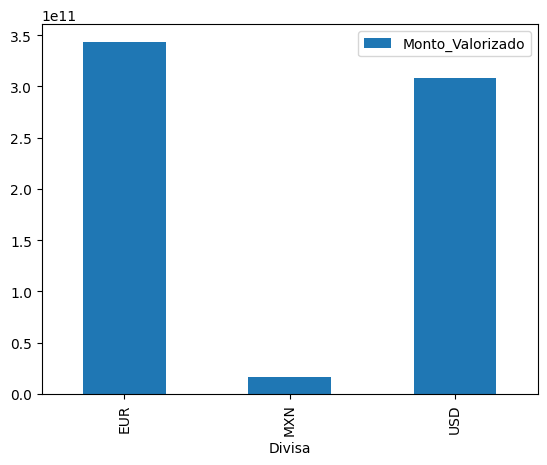

In [ ]:
df_bank_clean[['Divisa', 'Monto_Credito', 'Monto_Valorizado']].groupby("Divisa").sum().reset_index().plot.bar(x='Divisa', y='Monto_Valorizado')

<Axes: xlabel='Plazo', ylabel='Monto_Credito'>

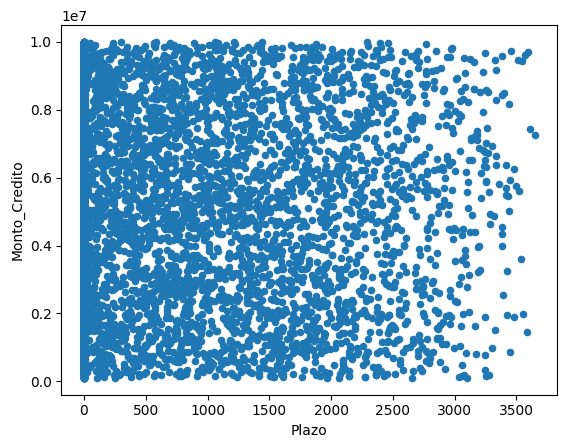

In [ ]:
df_bank_clean.plot.scatter(x='Plazo', y='Monto_Credito')

# Índices con loc e iloc

# Lo que veremos

## 🚀 Clase 5

* Índices
* Tablas dinámicas
* Iteración sobre dataframes
* Melt y más


## 🚀 Clase 6

* maps listas
* Funciones definidas por el usuario
* POO: Clases, métodos y librerías, métodos estáticos y privados; decoradores

## 🚀 Clase 7: SQL
